In [90]:
import numpy as np

# Constants
G = 1  # Gravitational constant
mS = 1e7  # Mass of the sun
mP = 1e4  # Mass of the planet
mA = 1  # Mass of the asteroid
R = 20  # Initial sun-planet distance

# Initial positions
xS = 0
xP = R  # Calculate xP to place the center of mass at the origin
rCM = (mP * np.array([xP, 0]) + mS * np.array([xS, 0])) / (mP + mS)  # Center of mass
rS = np.array([xS, 0]) - rCM  # Adjusted sun position
rP = np.array([xP, 0]) - rCM  # Adjusted planet position

# Initial position of the asteroid (θ = 45° ahead)
theta = np.deg2rad(45)
xA = R * np.cos(theta)
yA = R * np.sin(theta)
rA = np.array([xA, yA]) - rCM  # Adjusted asteroid position

# Print initial positions
print(f"Initial Sun Position (rS): {rS}")
print(f"Initial Planet Position (rP): {rP}")
print(f"Initial Asteroid Position (rA): {rA}")

Initial Sun Position (rS): [-0.01998002  0.        ]
Initial Planet Position (rP): [19.98001998  0.        ]
Initial Asteroid Position (rA): [14.1221556  14.14213562]


In [91]:
# Initial positions
xS = 0
xP = R  # Calculate xP to place the center of mass at the origin
rCM = (mP * np.array([xP, 0]) + mS * np.array([xS, 0])) / (mP + mS)  # Center of mass
rS = np.array([xS, 0]) - rCM  # Adjusted sun position
rP = np.array([xP, 0]) - rCM  # Adjusted planet position

# Initial position of the asteroid (θ = 45° ahead)
theta = np.deg2rad(45)
xA = R * np.cos(theta)
yA = R * np.sin(theta)
rA = np.array([xA, yA]) - rCM  # Adjusted asteroid position

# Calculate planet's angular velocity (w)
mu = (mS * mP) / (mS + mP)
w = np.sqrt(G * ((mS + mP)) / R**3)


# Directions of velocity vectors (perpendicular to the position vectors)
vS = w*np.array([-rS[1], rS[0]])
vP = w*np.array([-rP[1], rP[0]])
vA = w*np.array([-rA[1], rA[0]])

y = np.concatenate((rS,vS,rP,vP,rA,vA))

# Print initial vector y
print(f"Initial Vector y: {y}")

Initial Vector y: [-1.99800200e-02  0.00000000e+00 -0.00000000e+00 -7.06753493e-01
  1.99800200e+01  0.00000000e+00 -0.00000000e+00  7.06753493e+02
  1.41221556e+01  1.41421356e+01 -5.00249938e+02  4.99543184e+02]


In [92]:
def GeneralODE(t, y):
    global mS, mP, mA, G
    rS = y[0:2]
    vS = y[2:4]
    rP = y[4:6]
    vP = y[6:8]
    rA = y[8:10]
    vA = y[10:12]

    # Compute distances and forces
    dSP = np.linalg.norm(rS - rP)
    dSA = np.linalg.norm(rS - rA)
    dPA = np.linalg.norm(rP - rA)

    FSP = G * mS * mP * (rP - rS) / (dSP**3)
    FSA = G * mS * mA * (rA - rS) / (dSA**3)
    FPA = G * mP * mA * (rA - rP) / (dPA**3)

    # Compute accelerations
    aS = (FSP + FSA) / mS
    aP = (-FSP + FPA) / mP
    aA = (-FSA - FPA) / mA

    # Construct dydt
    dydt = np.concatenate((vS, aS, vP, aP, vA, aA))

    return dydt

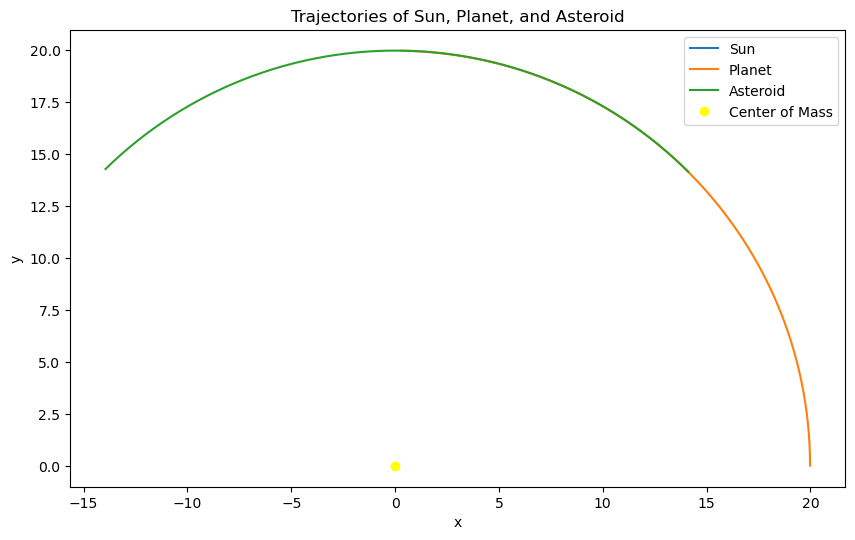

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Adjust dt for 1000 steps per orbit
P = np.sqrt((4 * np.pi**2) / (G * (mS + mP)) * R**3)
dt = P / 1000

# Fourth-order Runge-Kutta method
def runge_kutta(dt, t_final, y):
    num_steps = int(t_final / dt)
    trajectory = []

    for i in range(num_steps):
        trajectory.append(y.copy())  # Append current state to trajectory
        k1 = GeneralODE(i*dt, y)
        k2 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k1*dt)
        k3 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k2*dt)
        k4 = GeneralODE(i*dt + dt, y + k3*dt)
        y = y + (k1 + 2*k2 + 2*k3 + k4) * dt/ 6 

    return np.array(trajectory)



# Run simulation from t=0 until t=T/4
T = P
y_trajectory = runge_kutta(dt, T/4, y)

# Extract positions of sun, planet, and asteroid
xS_traj, yS_traj = y_trajectory[:, 0], y_trajectory[:, 1]
xP_traj, yP_traj = y_trajectory[:, 4], y_trajectory[:, 5]
xA_traj, yA_traj = y_trajectory[:, 8], y_trajectory[:, 9]

# Plot trajectories
plt.figure(figsize=(10, 8))
plt.plot(xS_traj, yS_traj, label='Sun')
plt.plot(xP_traj, yP_traj, label='Planet')
plt.plot(xA_traj, yA_traj, label='Asteroid')
plt.plot(0, 0, 'o', color='yellow', label='Center of Mass')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of Sun, Planet, and Asteroid')
plt.legend()
plt.show()

In [31]:
Which trajectory will appear as a
point? How can you distinguish between the planet and the asteroid in your plot?

SyntaxError: invalid syntax (2248610091.py, line 1)

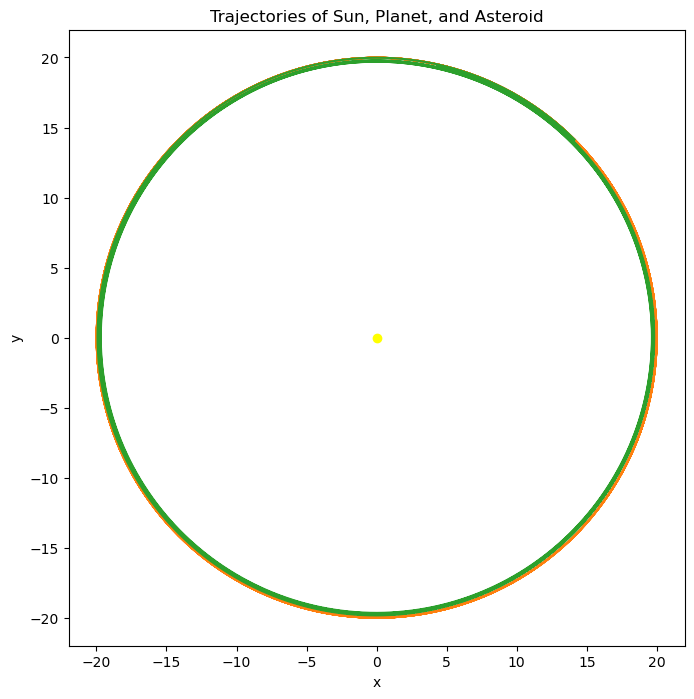

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Adjust dt for 1000 steps per orbit
P = np.sqrt((4 * np.pi**2) / (G * (mS + mP)) * R**3)
dt = P / 1000

# Fourth-order Runge-Kutta method
def runge_kutta(dt, t_final, y):
    num_steps = int(t_final / dt)
    trajectory = []

    for i in range(num_steps):
        trajectory.append(y.copy())  # Append current state to trajectory
        k1 = GeneralODE(i*dt, y)
        k2 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k1*dt)
        k3 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k2*dt)
        k4 = GeneralODE(i*dt + dt, y + k3*dt)
        y = y + (k1 + 2*k2 + 2*k3 + k4) * dt/ 6 

    return np.array(trajectory)



# Run simulation from t=0 until t=T/4
T = 20 * P
y_trajectory = runge_kutta(dt, T/4, y)

# Extract positions of sun, planet, and asteroid
xS_traj, yS_traj = y_trajectory[:, 0], y_trajectory[:, 1]
xP_traj, yP_traj = y_trajectory[:, 4], y_trajectory[:, 5]
xA_traj, yA_traj = y_trajectory[:, 8], y_trajectory[:, 9]

# Plot trajectories
plt.figure(figsize=(10, 8))
plt.plot(xS_traj, yS_traj, label='Sun')
plt.plot(xP_traj, yP_traj, label='Planet')
plt.plot(xA_traj, yA_traj, label='Asteroid')
plt.plot(0, 0, 'o', color='yellow', label='Center of Mass')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of Sun, Planet, and Asteroid')
plt.show()

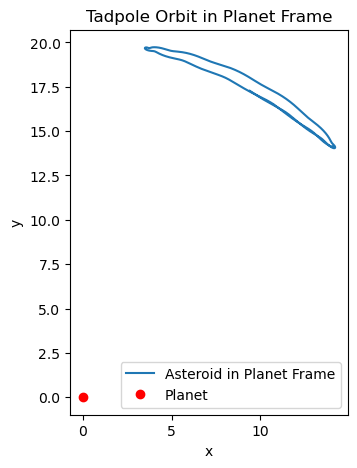

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Function to transform coordinates into the frame of the planet
def TransformIntoPlanetFrame(xp, yp, x, y):
    phi = np.arctan2(yp, xp)
    s = np.sin(phi)
    c = np.cos(phi)

    A = np.array([[c, s], [-s, c]])

    r = np.array([x, y])
    rt = A.dot(r)  # matrix vector multiplication

    xt = rt[0]
    yt = rt[1]

    return [xt, yt]

def runge_kutta(dt, t_final, y):
    num_steps = int(t_final / dt)
    asteroid_trajectory_x = []
    asteroid_trajectory_y = []

    for i in range(num_steps):
        xa = y[8]
        ya = y[9]
        xp = y[4]
        yp = y[5]
        xx, yy = TransformIntoPlanetFrame(xp, yp, xa, ya)
        asteroid_trajectory_x.append(xx)  # Append current state to trajectory
        asteroid_trajectory_y.append(yy)
        k1 = GeneralODE(i*dt, y)
        k2 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k1*dt)
        k3 = GeneralODE(i*dt + 0.5*dt, y + 0.5*k2*dt)
        k4 = GeneralODE(i*dt + dt, y + k3*dt)
        y = y + (k1 + 2*k2 + 2*k3 + k4) * dt/ 6 

    return asteroid_trajectory_x, asteroid_trajectory_y

y0 = np.concatenate((rS,vS,rP,vP,rA,vA))
y = y0
xAP_frame, yAP_frame = runge_kutta(dt, 15*P, y)

# Plot transformed coordinates (tadpole orbit)
plt.figure(figsize=(8, 5))
plt.plot(xAP_frame, yAP_frame, label='Asteroid in Planet Frame')
plt.plot(0, 0, 'o', color='red', label='Planet')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tadpole Orbit in Planet Frame')
plt.legend()
plt.show()